In [1]:
import glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img

/home/student/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-11-29 14:13:52.210038: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 14:13:52.254867: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 14:13:52.254905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 14:13:52.256

In [2]:
# Load modlities of GRADE 3
G3_mod_1 = glob.glob(r"GRADE-3/t1/*.png") 
G3_mod_2 = glob.glob(r"GRADE-3/t1ce/*.png")
# G3_mod_3 = glob.glob(r"GRADE-3/t2/*.png")
# G3_mod_4 = glob.glob(r"GRADE-3/t1ce/*.png")

# Load modlities of GRADE 4
G4_mod_1 = glob.glob(r"GRADE-4/t1/*.png")
G4_mod_2 = glob.glob(r"GRADE-4/t1ce/*.png")
# G4_mod_3 = glob.glob(r"GRADE-4/t2/*.png")
# G4_mod_4 = glob.glob(r"GRADE-4/t1ce/*.png")

#G3 data place holder
G3_mod_1_data = []
G3_mod_2_data = []
# G3_mod_3_data = []
# G3_mod_4_data = []

#G4 data place holder
G4_mod_1_data = []
G4_mod_2_data = []
# G4_mod_3_data = []
# G4_mod_4_data = []


# Read GRADE-3 images and store them in placeholder
for img in G3_mod_1:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G3_mod_1_data.append(data)

for img in G3_mod_2:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G3_mod_2_data.append(data)

# for img in G3_mod_3:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G3_mod_3_data.append(data)
    
# for img in G3_mod_4:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G3_mod_4_data.append(data)

# Read GRADE-4 images and store them in placeholder
for img in G4_mod_1:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G4_mod_1_data.append(data)

for img in G4_mod_2:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G4_mod_2_data.append(data)
    
# for img in G4_mod_3:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G4_mod_3_data.append(data)
    
# for img in G4_mod_4:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G4_mod_4_data.append(data)

In [3]:
''' 
Create two array 'zeros' and 'ones' containing all zeros and ones respectively. 
Here the  zeros array serves the purpose of labels for GRADE-3 and the ones array serves the purpose of labels for GRADE-4
'''

zeros= np.zeros(len(G3_mod_1))

ones = np.ones(len(G4_mod_1))


In [4]:
# Combine same modalities of different GRADES for training. 

img_mod_1_data = G3_mod_1_data + G4_mod_1_data
img_mod_2_data = G3_mod_2_data + G4_mod_2_data
# img_mod_3_data = G3_mod_3_data + G4_mod_3_data
# img_mod_4_data = G3_mod_4_data + G4_mod_4_data

img_mod_1_data = np.array(img_mod_1_data)
img_mod_2_data = np.array(img_mod_2_data)
# img_mod_3_data = np.array(img_mod_3_data)
# img_mod_4_data = np.array(img_mod_4_data)

img_mod_1 = img_mod_1_data/255
img_mod_2 = img_mod_2_data/255
# img_mod_3 = img_mod_3_data/255
# img_mod_4 = img_mod_4_data/255

# print(img_mod_1_data.shape, img_mod_2_data.shape, img_mod_3_data.shape, img_mod_4_data.shape)
print(img_mod_1_data.shape, img_mod_2_data.shape)

(2856, 224, 224, 3) (2856, 224, 224, 3)


In [5]:
# Combining labels for both GRADES into one array/list

labels = np.append(zeros, ones)

In [6]:
# CNN model definition
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# For Mod_1
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3, 3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(128, (3, 3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(128, activation="relu"))

# For Mod_2
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(128, (3, 3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation="relu"))

fused_features = tf.keras.layers.Concatenate()([model_1.output, model_2.output])

output = Dense(1, activation='sigmoid')(fused_features)

model = Model(inputs = [model_1.input, model_2.input], outputs = output)


2023-11-29 14:14:08.056850: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 14:14:08.090981: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 14:14:08.091042: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 14:14:08.095921: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 14:14:08.096005: I external/local_xla/xla/stream_executor

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()], run_eagerly=True)

In [8]:
#comb = np.concatenate([img_mod_1, img_mod_2, img_mod_3, img_mod_4], axis = -1)
# comb = img_mod_1

# print("Mod 1 and Mod 2 Shape: ", comb.shape)
# print("Labels Shape: ", labels.shape)

In [9]:
from sklearn.model_selection import train_test_split

img_1_train, img_1_test, labels_1_train, labels_1_test = train_test_split(img_mod_1, labels, stratify=labels, test_size=0.2, random_state = 42)
img_1_train, img_1_val, labels_1_train, labels_1_val = train_test_split(img_1_train, labels_1_train, stratify=labels_1_train, test_size=0.25, random_state = 42)

print(img_1_train.shape, labels_1_train.shape)
print(img_1_val.shape, labels_1_val.shape)
print(img_1_test.shape, labels_1_test.shape)

(1713, 224, 224, 3) (1713,)
(571, 224, 224, 3) (571,)
(572, 224, 224, 3) (572,)


In [10]:
img_2_train, img_2_test, labels_2_train, labels_2_test = train_test_split(img_mod_2, labels, stratify=labels, test_size=0.2, random_state = 42)
img_2_train, img_2_val, labels_2_train, labels_2_val = train_test_split(img_2_train, labels_2_train, stratify=labels_2_train, test_size=0.25, random_state = 42)

print(img_2_train.shape, labels_2_train.shape)
print(img_2_val.shape, labels_2_val.shape)
print(img_2_test.shape, labels_2_test.shape)

(1713, 224, 224, 3) (1713,)
(571, 224, 224, 3) (571,)
(572, 224, 224, 3) (572,)


In [11]:
# Train the model and store the results
history = model.fit([img_1_train, img_2_train], [labels_1_train, labels_2_train], validation_data=([img_1_val, img_2_val], [labels_1_val, labels_2_val]),  epochs=20, batch_size=32)

Epoch 1/20


2023-11-29 14:14:26.534200: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
2023-11-29 14:14:34.302444: I external/local_xla/xla/service/service.cc:168] XLA service 0xce9b0d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-29 14:14:34.302498: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2023-11-29 14:14:34.309116: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1701247474.468931   18815 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


54/54 [==============================] - 34s 354ms/step - loss: 0.7451 - binary_accuracy: 0.5108 - precision: 0.5118 - recall: 0.6998 - auc: 0.5151 - val_loss: 0.6898 - val_binary_accuracy: 0.6322 - val_precision: 0.5833 - val_recall: 0.9479 - val_auc: 0.6451
Epoch 2/20
54/54 [==============================] - 7s 128ms/step - loss: 0.6216 - binary_accuracy: 0.6457 - precision: 0.6480 - recall: 0.6547 - auc: 0.7102 - val_loss: 0.4094 - val_binary_accuracy: 0.8284 - val_precision: 0.8188 - val_recall: 0.8472 - val_auc: 0.9050
Epoch 3/20
54/54 [==============================] - 8s 148ms/step - loss: 0.3981 - binary_accuracy: 0.8214 - precision: 0.8218 - recall: 0.8256 - auc: 0.9027 - val_loss: 0.2676 - val_binary_accuracy: 0.8809 - val_precision: 0.8216 - val_recall: 0.9757 - val_auc: 0.9784
Epoch 4/20
54/54 [==============================] - 7s 132ms/step - loss: 0.1870 - binary_accuracy: 0.9259 - precision: 0.9302 - recall: 0.9226 - auc: 0.9793 - val_loss: 0.1396 - val_binary_accuracy: 

2023-11-29 14:15:33.527613: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 38535424 bytes after encountering the first element of size 38535424 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 [==============================] - 8s 140ms/step - loss: 0.0322 - binary_accuracy: 0.9907 - precision: 0.9930 - recall: 0.9885 - auc: 0.9993 - val_loss: 0.0649 - val_binary_accuracy: 0.9825 - val_precision: 0.9760 - val_recall: 0.9896 - val_auc: 0.9948
Epoch 7/20
54/54 [==============================] - ETA: 0s - loss: 0.0103 - binary_accuracy: 0.9988 - precision: 0.9988 - recall: 0.9988 - auc: 1.0000

2023-11-29 14:15:42.208137: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 38535424 bytes after encountering the first element of size 38535424 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 [==============================] - 8s 155ms/step - loss: 0.0103 - binary_accuracy: 0.9988 - precision: 0.9988 - recall: 0.9988 - auc: 1.0000 - val_loss: 0.0213 - val_binary_accuracy: 0.9895 - val_precision: 0.9896 - val_recall: 0.9896 - val_auc: 0.9997
Epoch 8/20
54/54 [==============================] - 9s 159ms/step - loss: 0.0033 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0115 - val_binary_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9896 - val_auc: 1.0000
Epoch 9/20
54/54 [==============================] - ETA: 0s - loss: 5.8172e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000

2023-11-29 14:15:57.907427: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 38535424 bytes after encountering the first element of size 38535424 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 [==============================] - 7s 133ms/step - loss: 5.8172e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0096 - val_binary_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9896 - val_auc: 1.0000
Epoch 10/20
54/54 [==============================] - 7s 135ms/step - loss: 2.5213e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0114 - val_binary_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9896 - val_auc: 1.0000
Epoch 11/20
54/54 [==============================] - ETA: 0s - loss: 1.6859e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000

2023-11-29 14:16:13.265129: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 38535424 bytes after encountering the first element of size 38535424 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 [==============================] - 8s 151ms/step - loss: 1.6859e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0117 - val_binary_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9896 - val_auc: 1.0000
Epoch 12/20
54/54 [==============================] - 7s 131ms/step - loss: 1.2433e-04 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0148 - val_binary_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9896 - val_auc: 1.0000
Epoch 13/20
54/54 [==============================] - 7s 136ms/step - loss: 9.6350e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0113 - val_binary_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9896 - val_auc: 1.0000
Epoch 14/20
54/54 [==============================] - 7s 139ms/step - loss: 6.9634e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0149 - val

2023-11-29 14:17:07.326759: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 38535424 bytes after encountering the first element of size 38535424 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 [==============================] - 8s 155ms/step - loss: 2.6230e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0165 - val_binary_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9896 - val_auc: 1.0000
Epoch 19/20
54/54 [==============================] - 7s 134ms/step - loss: 2.0382e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0155 - val_binary_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9896 - val_auc: 1.0000
Epoch 20/20
54/54 [==============================] - 7s 132ms/step - loss: 2.6043e-05 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0173 - val_binary_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9896 - val_auc: 1.0000


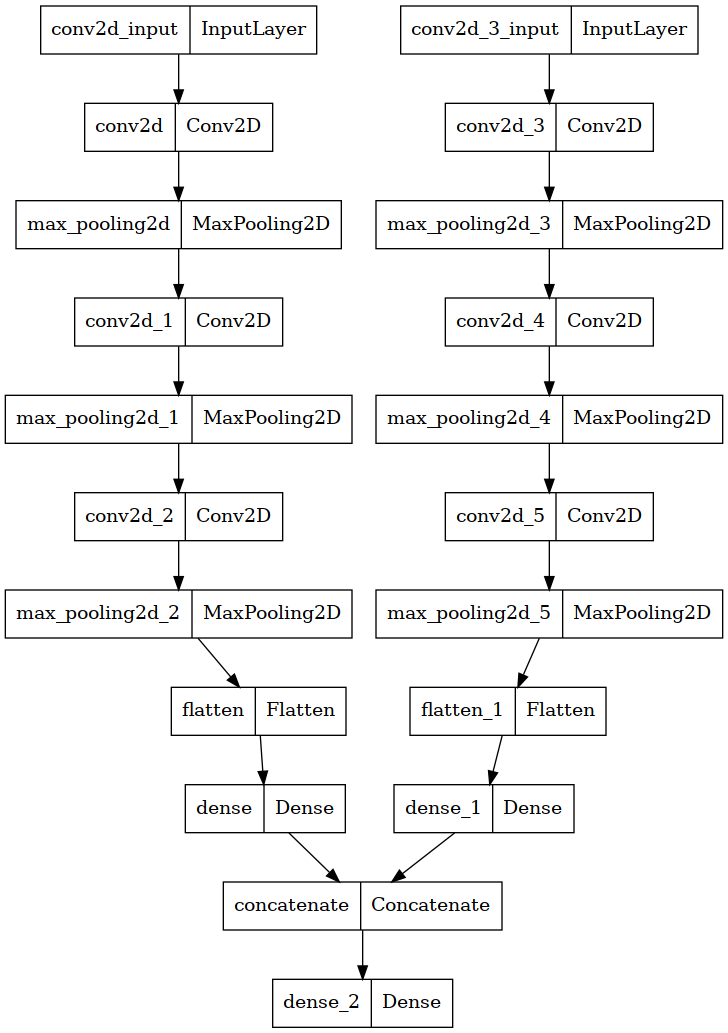

In [12]:
from keras.utils import plot_model
plot_model(model)

In [13]:
# Evaluate model on unseen (test) data

y_pred = model.predict([img_1_test, img_2_test])
y_pred_binary = (y_pred > 0.5).astype(int) 

# Calculate accuracy
accuracy = accuracy_score(labels_1_test, y_pred_binary)
precision = precision_score(labels_1_test, y_pred_binary)
recall = recall_score(labels_1_test, y_pred_binary)
f1 = f1_score(labels_1_test, y_pred_binary)

# Confusion matrix
conf_matrix = confusion_matrix(labels_1_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

18/18 [==============================] - 1s 64ms/step
Accuracy: 0.9877622377622378
Precision: 0.993006993006993
Recall: 0.9826989619377162
F1 Score: 0.9878260869565217
Confusion Matrix:
[[281   2]
 [  5 284]]


In [14]:
# Calculate accuracy
accuracy = accuracy_score(labels_2_test, y_pred_binary)
precision = precision_score(labels_2_test, y_pred_binary)
recall = recall_score(labels_2_test, y_pred_binary)
f1 = f1_score(labels_2_test, y_pred_binary)

# Confusion matrix
conf_matrix = confusion_matrix(labels_2_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9877622377622378
Precision: 0.993006993006993
Recall: 0.9826989619377162
F1 Score: 0.9878260869565217
Confusion Matrix:
[[281   2]
 [  5 284]]


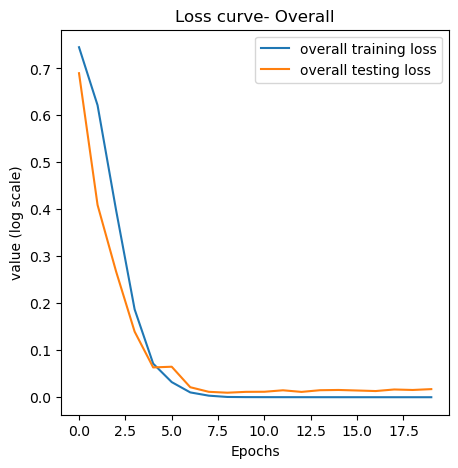

In [15]:
# Loss Curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Overall")
plt.plot(history.history["loss"], label="overall training loss")
plt.plot(history.history["val_loss"], label="overall testing loss")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

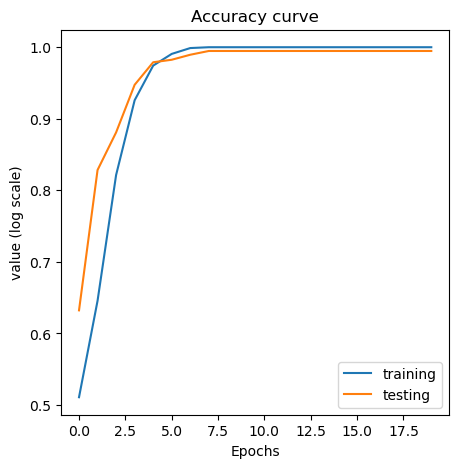

In [17]:
# Accuracy Curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Accuracy curve")
plt.plot(history.history["binary_accuracy"], label="training")
plt.plot(history.history["val_binary_accuracy"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

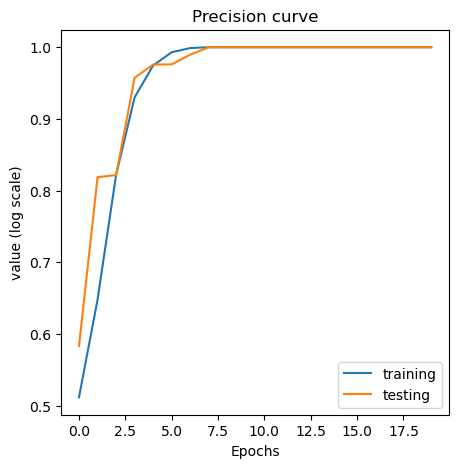

In [18]:
# Precision Curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Precision curve")
plt.plot(history.history["precision"], label="training")
plt.plot(history.history["val_precision"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

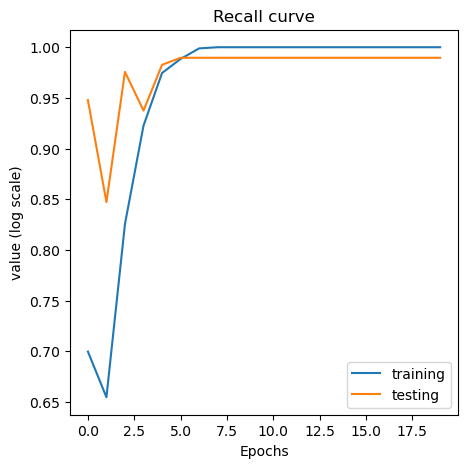

In [19]:
#Recall curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall curve")
plt.plot(history.history["recall"], label="training")
plt.plot(history.history["val_recall"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

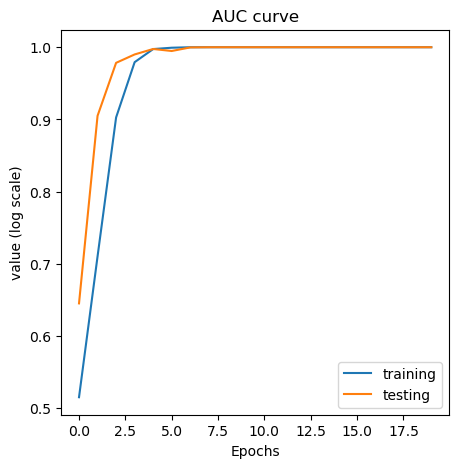

In [20]:
# AUC curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("AUC curve")
plt.plot(history.history["auc"], label="training")
plt.plot(history.history["val_auc"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()